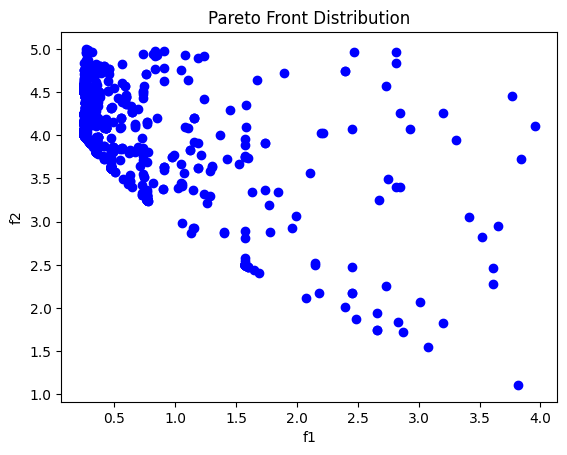

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 解码函数：将二进制编码解码为实际值
def decode(binary, lower_bound, upper_bound):
    decimal = int(binary, 2)
    max_decimal = 2**len(binary) - 1
    return lower_bound + (upper_bound - lower_bound) * decimal / max_decimal

# 目标函数
def objective(x1, x2):
    f1 = x1**2 / 4
    f2 = x1 * (1 - x2) + 5
    return f1, f2

# 初始化种群
def init_population(pop_size, chromosome_length):
    return [''.join(np.random.choice(['0', '1'], size=chromosome_length)) for _ in range(pop_size)]

# 选择：使用锦标赛选择
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        candidates = np.random.choice(population, k)
        best = min(candidates, key=lambda ind: fitness[population.index(ind)])
        selected.append(best)
    return selected

# 单点交叉
def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# 变异：基本位变异
def mutation(individual, mutation_rate):
    mutated = ''.join(bit if np.random.rand() > mutation_rate else str(1 - int(bit)) for bit in individual)
    return mutated

# 计算适应度函数（这里的适应度是基于目标函数的Pareto前沿分布）
def evaluate_population(population, bounds, chromosome_length):
    decoded_population = [(decode(ind[:chromosome_length//2], bounds[0][0], bounds[0][1]),
                           decode(ind[chromosome_length//2:], bounds[1][0], bounds[1][1])) for ind in population]
    fitness = [objective(x1, x2) for x1, x2 in decoded_population]
    return fitness, decoded_population

# 主函数：遗传算法
def genetic_algorithm(pop_size, chromosome_length, generations, crossover_rate, mutation_rate, bounds):
    # 初始化种群
    population = init_population(pop_size, chromosome_length)
    
    # 存储每一代的Pareto前沿解
    pareto_front = []

    # 迭代
    for gen in range(generations):
        # 评估种群
        fitness, decoded_population = evaluate_population(population, bounds, chromosome_length)

        # 更新Pareto前沿
        for f, ind in zip(fitness, decoded_population):
            pareto_front.append(f)

        # 选择
        selected_population = tournament_selection(population, fitness)

        # 交叉
        new_population = []
        for i in range(0, pop_size, 2):
            if np.random.rand() < crossover_rate:
                child1, child2 = crossover(selected_population[i], selected_population[i+1])
            else:
                child1, child2 = selected_population[i], selected_population[i+1]
            new_population.extend([child1, child2])

        # 变异
        population = [mutation(ind, mutation_rate) for ind in new_population]

    # 返回Pareto前沿
    return pareto_front

# 参数设置
pop_size = 100
chromosome_length = 16  # 每个变量用8位编码，共16位
generations = 100
crossover_rate = 0.8
mutation_rate = 0.01
bounds = [(1, 4), (1, 2)]  # x1在1到4之间，x2在1到2之间

# 运行遗传算法
pareto_front = genetic_algorithm(pop_size, chromosome_length, generations, crossover_rate, mutation_rate, bounds)

# 提取Pareto前沿的目标值
f1_values = [f[0] for f in pareto_front]
f2_values = [f[1] for f in pareto_front]

# 绘制Pareto前沿解的分布
plt.scatter(f1_values, f2_values, color='blue')
plt.title('Pareto Front Distribution')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()
